In [1]:
!pip install geopandas
!pip install contextily
import geopandas
import contextily as ctx

     |████████████████████████████████| 1.0 MB 13.9 MB/s 
     |████████████████████████████████| 6.3 MB 56.2 MB/s 
     |████████████████████████████████| 15.4 MB 39.5 MB/s 
     |████████████████████████████████| 19.3 MB 73.8 MB/s 


1. visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano

In [82]:
percorsi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Corsi_acqua_Piano_di_Gestione.zip")
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g/ProvCM01012021_g_WGS84.dbf")
milano = province[province.DEN_UTS == "Milano"]
percorsiMilano = percorsi[percorsi.intersects(milano.geometry.squeeze())]
percorsiMilano.sort_values("SHAPE_LEN",ascending = False).head(10)

OBJECTID  ...                                           geometry
18       124  ...  MULTILINESTRING ((478097.612 5045956.958, 4780...
36       593  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
10        84  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
0        188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
7         65  ...  MULTILINESTRING ((483579.882 5034726.498, 4835...
31       501  ...  LINESTRING (541227.887 5050214.931, 541227.203...
26       357  ...  MULTILINESTRING ((495438.399 5047188.843, 4954...
8         66  ...  MULTILINESTRING ((477067.969 5044605.066, 4770...
15       112  ...  MULTILINESTRING ((516227.432 5021570.890, 5162...
1        191  ...  MULTILINESTRING ((494060.091 5029696.046, 4940...

[10 rows x 31 columns]

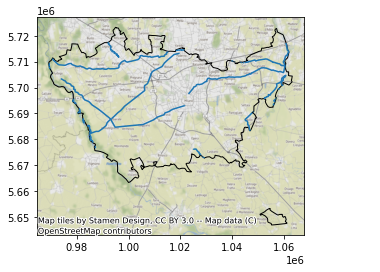

In [3]:
ax = percorsiMilano.sort_values("SHAPE_LEN",ascending = False).head(10).to_crs(epsg=3857).plot()
milano.to_crs(epsg=3857).plot(ax = ax, facecolor="none",edgecolor="k")
ctx.add_basemap(ax)

2. visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa

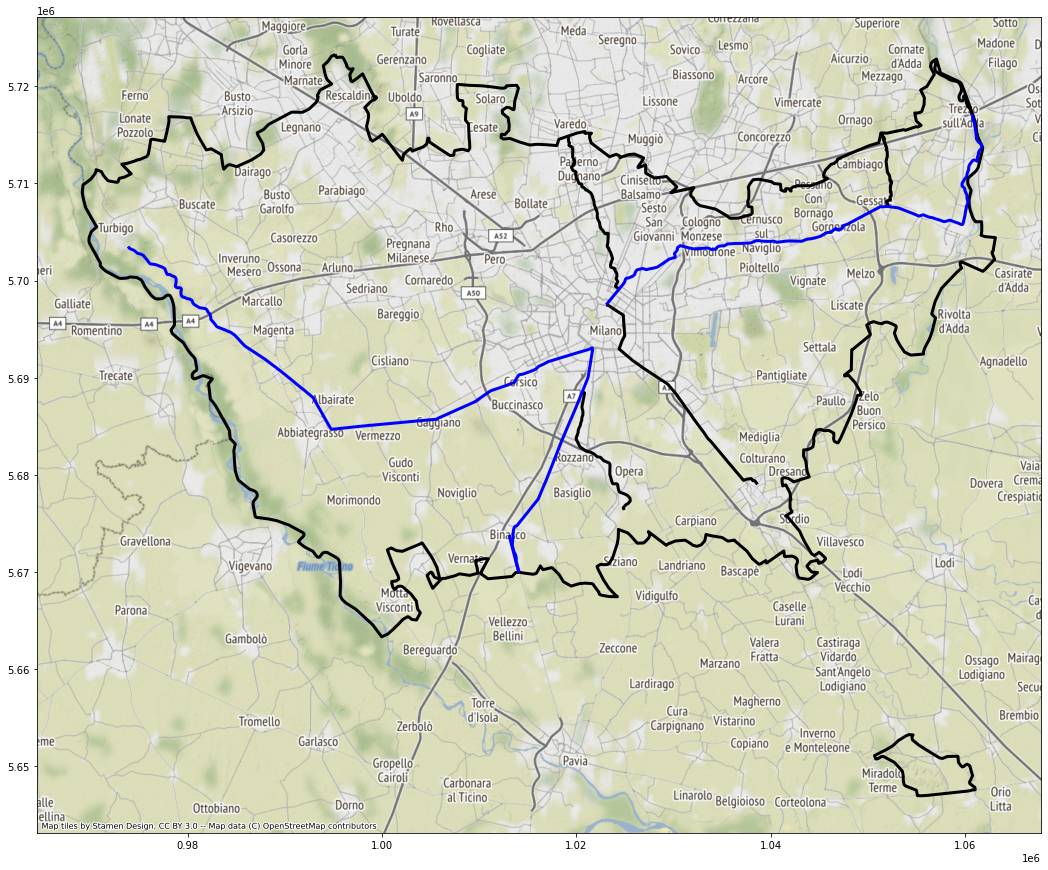

In [7]:
navigli = percorsi[percorsi.NOME.str.contains("Navigli")]
fiumi = percorsi[percorsi.touches(navigli.unary_union)]
ax = fiumi.to_crs(epsg=3857).plot(figsize=(20,15), facecolor="none",edgecolor="k", linewidth = 3)
navigli.to_crs(epsg=3857).plot(ax = ax, facecolor="none",edgecolor="b", linewidth = 3)
milano.to_crs(epsg=3857).plot(ax = ax, facecolor="none",edgecolor="k", linewidth = 3)
ctx.add_basemap(ax)

3. visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente

Inserisci il nome del comune Milano


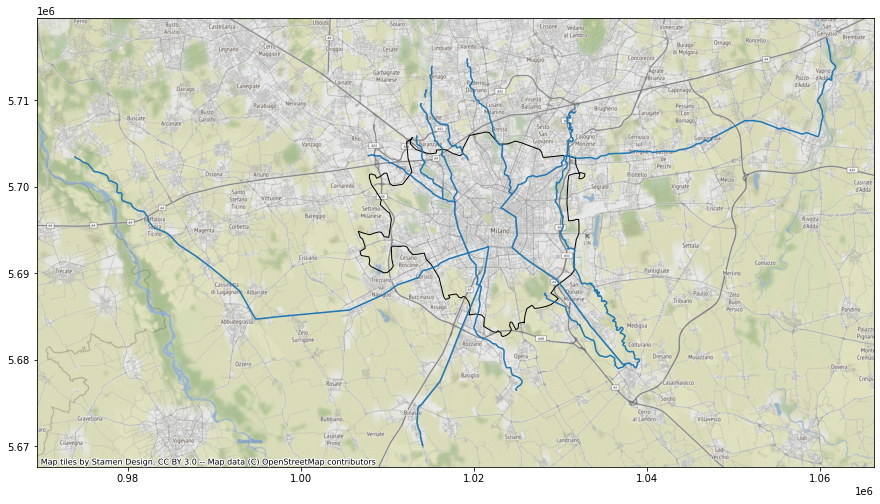

In [110]:
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g")
comune = input("Inserisci il nome del comune ")
if comune not in comuni.COMUNE.tolist():
  print("Il comune non è presente ")
else:
  comuneUtente = comuni[comuni.COMUNE == comune]
  percorsiUtenti = percorsi[percorsi.intersects(comuneUtente.geometry.squeeze())]
  ax = comuneUtente.to_crs(epsg=3857).plot(facecolor="none",edgecolor="k",figsize=(15,10))
  percorsiUtenti.to_crs(epsg=3857).plot(ax=ax)
  ctx.add_basemap(ax)

4. visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni  che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa

Inserire nome fiume Muzza (Colatore)


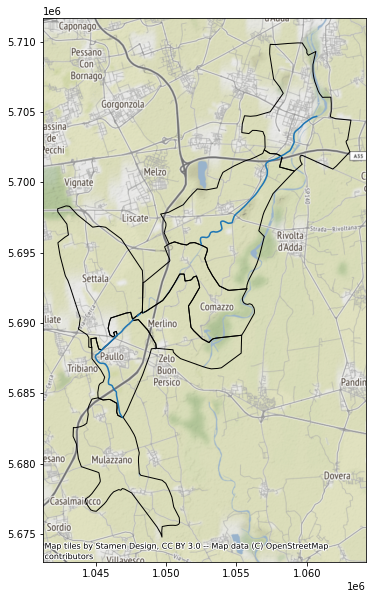

In [108]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm") 
fiume = input("Inserire nome fiume ")
if fiume not in percorsi.NOME.tolist():
  print("Il fiume non è presente")
else:
  fiumeUtente = percorsi[percorsi.NOME == fiume]
  comuniUtenti = comuni[comuni.intersects(fiumeUtente.unary_union)]
  ax = comuniUtenti.to_crs(epsg=3857).plot(facecolor="none",edgecolor="k",figsize=(15,10))
  fiumeUtente.to_crs(epsg=3857).plot(ax=ax)
  ctx.add_basemap(ax)

5. visualizzi il numero di corsi d'acqua della provincia di Milano e la lunghezza totale di tutti i corsi d'acqua

In [54]:
print("Il numero di corsi d'acqua della provincia di Milano è", percorsiMilano.count()["NOME"])
print("La lugnhezza totale di tutti i corsi d'acqua è", percorsiMilano.length.sum())

Il numero di corsi d'acqua della provincia di Milano è 45
La lugnhezza totale di tutti i corsi d'acqua è 543998.2404654571


6. visualizzi su una mappa i comuni della provincia di Milano che non sono attraversati da corsi d'acqua

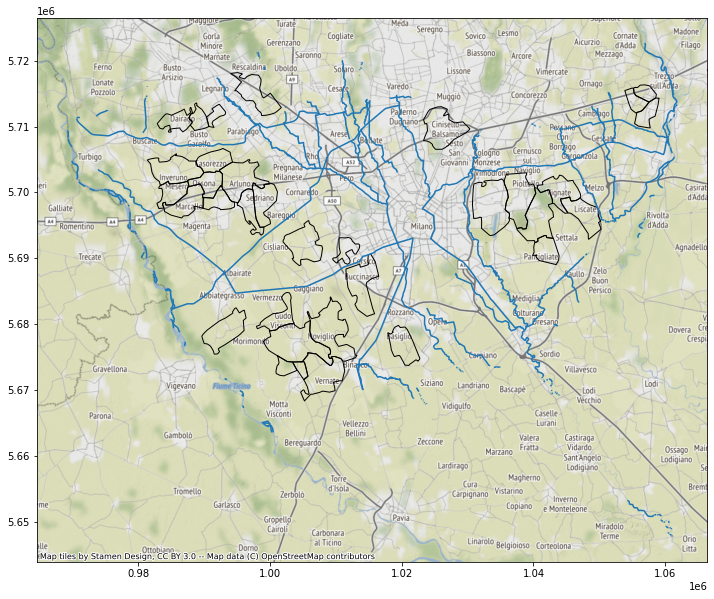

In [75]:
comuniMilano = comuni[comuni.within(milano.geometry.squeeze())]
comuniAttraversati = comuniMilano[comuniMilano.intersects(percorsi.unary_union)]
comuniNonAttraversati = comuniMilano.drop(comuniAttraversati.index)
ax = comuniNonAttraversati.to_crs(epsg=3857).plot(facecolor="none",edgecolor="k",figsize=(15,10))
percorsi.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)